# Exercise 1
## Advanced Machine Learning, SoSe 2021
### Authors: Aaron Osburg, Elias Olofsson
    Version information:
        2021-04-28: v.1.0. First public release. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

# Produce inline vector graphics
%config InlineBackend.figure_format = 'svg'

## 1. Loading the Dataset (2 pts)

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())

data         = digits['data']
target       = digits['target']
target_names = digits['target_names']
images       = digits['images']

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
print(data.dtype, data.shape)
print(target.dtype, target.shape)
print(target_names.dtype, target_names.shape, target_names)
print(images.dtype, images.shape)

float64 (1797, 64)
int64 (1797,)
int64 (10,) [0 1 2 3 4 5 6 7 8 9]
float64 (1797, 8, 8)


In [4]:
def create_binary_TS(label1, label2, data, target, target_names):
    """
    Create a binary training set from a larger training set. Relabels
    responses of class label1 to 1, and class label2 to -1.

    Parameters:
    -----------
    label1: string or int
        First class label.
    label2: string or int
        Second class label.
    data: np.array shape=(N', D)
        Feature matrix.
    target: np.array shape=(N',)
        Response vector. Containing integers corresponding to indices
        of the class labels in target_names.
    target_names: np.array of string/int values 
        Class labels.
    
    Returns:
    --------
    X: np.array shape=(N, D)
        Reduced feature matrix.
    y: np.array shape=(N,)
        Reduced response vector.
    """
    # Get target indices.
    target_idx1, = np.where(target_names == label1)
    target_idx2, = np.where(target_names == label2)

    # Filter out the corresponding instances.
    mask = (target == target_idx1) | (target == target_idx2)
    X = data[mask]
    y = target[mask]

    # Relabel targets.
    y[y == target_idx2] = -1
    y[y == target_idx1] = 1

    return X, y

In [5]:
X, y = create_binary_TS(3, 8, data, target, target_names)
print(X.shape, y.shape)

# TODO: ADD EXTRA COLUMN OF ONES FOR ABSORPTION OF INTERCEPT.

(357, 64) (357,)


1


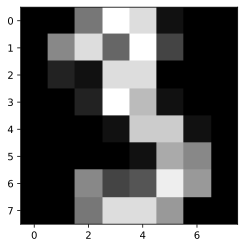

-1


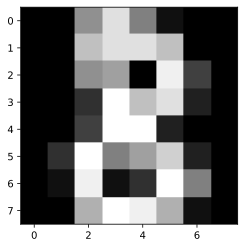

In [6]:
# Testing the first two instances.
idx = 0
print(y[idx])
plt.imshow(X[idx].reshape(8,8))
plt.show()

idx = 1
print(y[idx])
plt.imshow(X[idx].reshape(8,8))
plt.show()




## 1.1 Classification with sklearn (6 pts)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection